<a href="https://colab.research.google.com/github/mohammedameen2020-Civil/Mohammed-Ameen/blob/master/Road_Damage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import six.moves.urllib as urllib


In [2]:
#!wget https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/Japan/CACAIE2018/RoadDamageDataset.tar.gz

In [3]:
import os
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')

if not os.path.exists('./RoadDamageDataset.tar.gz'):
    url_base = 'https://s3-ap-northeast-1.amazonaws.com/mycityreport/RoadDamageDataset.tar.gz'
    urllib.request.urlretrieve(url_base, './RoadDamageDataset.tar.gz')
    
    print("Download RoadDamageDataset.tar.gz Done")
    
else:
    print("You have RoadDamageDataset.tar.gz")

You have RoadDamageDataset.tar.gz


In [4]:
#!wget https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/Japan/CACAIE2018/trainedModels.tar.gz

In [5]:
if not os.path.exists('./trainedModels.tar.gz'):
    url_base = 'https://s3-ap-northeast-1.amazonaws.com/mycityreport/trainedModels.tar.gz'
    urllib.request.urlretrieve(url_base, './trainedModels.tar.gz')
    
    print("Download trainedModels.tar.gz Done")
    
else:
    print("You have trainedModels.tar.gz")

You have trainedModels.tar.gz


In [6]:
# this procces may take a few minutes
!tar -zxf ./RoadDamageDataset.tar.gz
!tar -zxf ./trainedModels.tar.gz

In [7]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
base_path = os.getcwd() + '/RoadDamageDataset/'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs corresponds to municipality name.
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]

In [9]:
# the number of total images and total labels.
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：9053
# of labels：15457


D00 : 2768
D01 : 3789
D10 : 742
D11 : 636
D20 : 2541
D40 : 409
D43 : 817
D44 : 3733


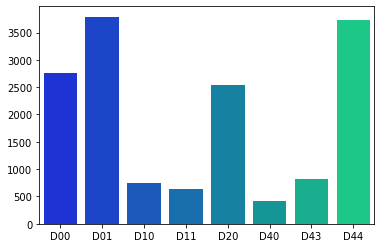

In [10]:
# the number of each class labels.
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [11]:
# the number of each class labels for each municipality
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    
    count_dict = collections.Counter(cls_names)
    cls_count = []
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
        
    print('**************************************************')

Adachi
# of images：1650
# of labels：2924
D00 : 529
D01 : 1013
D10 : 153
D11 : 279
D20 : 172
D40 : 11
D43 : 191
D44 : 567
**************************************************
Chiba
# of images：467
# of labels：797
D00 : 183
D01 : 187
D10 : 13
D11 : 12
D20 : 27
D40 : 3
D43 : 104
D44 : 267
**************************************************
Ichihara
# of images：254
# of labels：482
D00 : 175
D01 : 71
D10 : 18
D11 : 9
D20 : 43
D40 : 8
D43 : 20
D44 : 138
**************************************************
Muroran
# of images：2145
# of labels：3601
D00 : 671
D01 : 574
D10 : 124
D11 : 88
D20 : 1192
D40 : 189
D43 : 50
D44 : 712
**************************************************
Nagakute
# of images：1366
# of labels：2302
D00 : 482
D01 : 477
D10 : 169
D11 : 58
D20 : 351
D40 : 14
D43 : 90
D44 : 659
**************************************************
Numazu
# of images：2032
# of labels：3711
D00 : 560
D01 : 807
D10 : 245
D11 : 129
D20 : 735
D40 : 165
D43 : 161
D44 : 908
************************************

In [12]:
#Check some images in this dataset¶
import cv2
import random

In [13]:
def draw_images(image_file):
    gov = image_file.split('_')[0]
    img = cv2.imread(base_path + gov + '/JPEGImages/' + image_file.split('.')[0] + '.jpg')
    
    infile_xml = open(base_path + gov + '/Annotations/' +image_file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

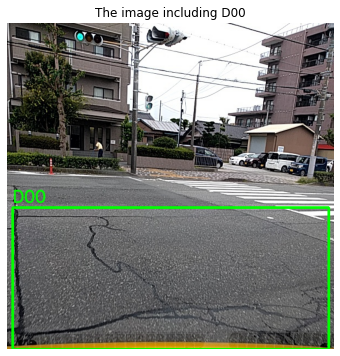

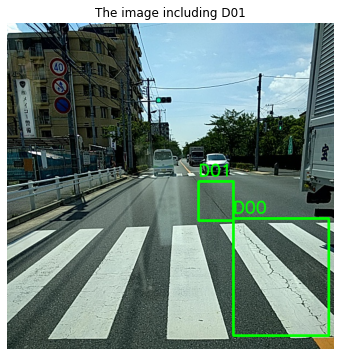

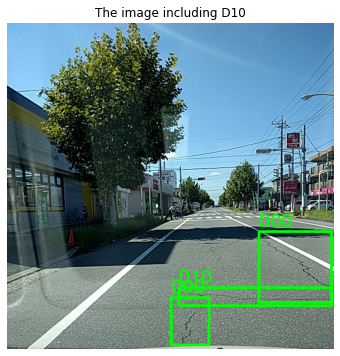

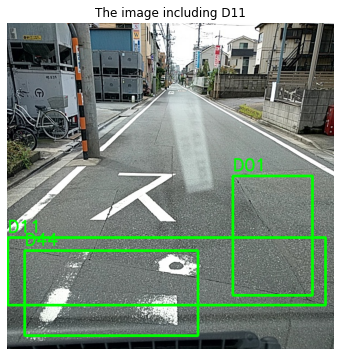

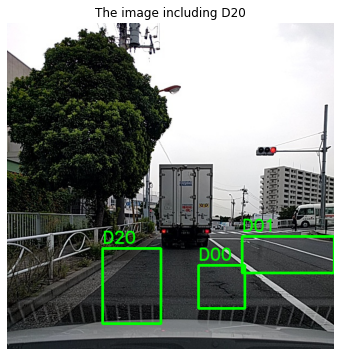

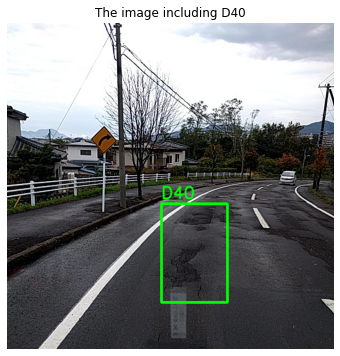

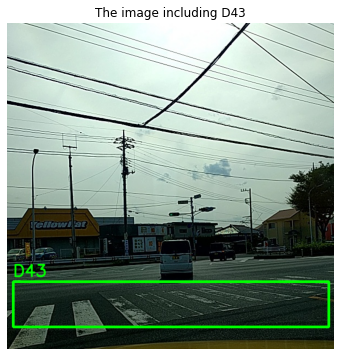

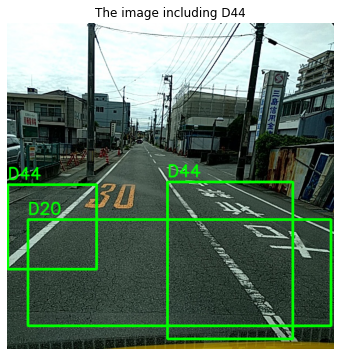

In [14]:
for damageType in damageTypes:
    tmp = []
    for gov in govs:
        file = open(base_path + gov + '/ImageSets/Main/%s_trainval.txt' %damageType, 'r')

        for line in file:
            line = line.rstrip('\n').split('/')[-1]

            if line.split(' ')[2] == '1':
                tmp.append(line.split(' ')[0]+'.xml')
        
        
    random.shuffle(tmp)
    fig = plt.figure(figsize=(6,6))
    for number, image in enumerate(tmp[0:1]):
        img = draw_images(image)
        plt.subplot(1,1,number+1)
        plt.axis('off')
        plt.title('The image including ' + damageType)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
#Next, try road damage detection using SSD_mobilenet! 
#Imports


In [16]:
import numpy as np
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [17]:
import sys

sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [18]:
%set_env PYTHONPATH=/root/models/research:/root/models/research/slim

env: PYTHONPATH=/root/models/research:/root/models/research/slim


In [19]:
sys.path.append("..")

In [20]:
pip install protobuf


In [21]:
rm -rf ~/.cache/pip/*

In [22]:
from python_utils import *


In [23]:
pip install tensorflow-object-detection-api

In [24]:
#from utils import label_map_util

#from python_utils import label_map_util 
#from object_detection.utils import label_map_util 
#from object_detection.protos import string_int_label_map_pb2

from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


In [25]:
#!pip install --upgrade tensorflow

In [26]:
!pip install tensorflow==1.4

In [27]:
#!pip show tensorflow


Name: tensorflow
Version: 1.4.0
Summary: TensorFlow helps the tensors flow
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: protobuf, wheel, tensorflow-tensorboard, numpy, six, enum34
Required-by: tensorflow-object-detection-api, fancyimpute


In [28]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT =  '/content/trainedModels/ssd_mobilenet_innference_graph.pb' 

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/label_map.pbtxt'

NUM_CLASSES = 8



In [30]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')


In [31]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [32]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [33]:
!wget https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/test1.tar.gz

--2020-08-06 07:34:13--  https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/test1.tar.gz
Resolving mycityreport.s3-ap-northeast-1.amazonaws.com (mycityreport.s3-ap-northeast-1.amazonaws.com)... 52.219.0.83
Connecting to mycityreport.s3-ap-northeast-1.amazonaws.com (mycityreport.s3-ap-northeast-1.amazonaws.com)|52.219.0.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186476694 (178M) [application/x-tar]
Saving to: ‘test1.tar.gz’

test1.tar.gz        100%[===================>] 177.84M  18.9MB/s    in 11s     

2020-08-06 07:34:24 (16.4 MB/s) - ‘test1.tar.gz’ saved [186476694/186476694]



In [34]:
# get images from val.txt
PATH_TO_TEST_IMAGES_DIR = '/content/RoadDamageDataset/'
D_TYPE = ['D00', 'D01', 'D10', 'D11', 'D20','D40', 'D43']
govs = ['Adachi', 'Ichihara', 'Muroran', 'Chiba', 'Sumida', 'Nagakute', 'Numazu']

val_list = []
for gov in govs:
    file = open(PATH_TO_TEST_IMAGES_DIR + gov + '/ImageSets/Main/val.txt', 'r')
    for line in file:
        line = line.rstrip('\n').split('/')[-1]
        val_list.append(line)
    file.close()

print("# of validation images：" + str(len(val_list)))


# of validation images：1813


In [35]:
TEST_IMAGE_PATHS=[]
random.shuffle(val_list)

for val_image in val_list[0:5]:
    TEST_IMAGE_PATHS.append(PATH_TO_TEST_IMAGES_DIR + val_image.split('_')[0]+ '/JPEGImages/%s.jpg' %val_image)
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

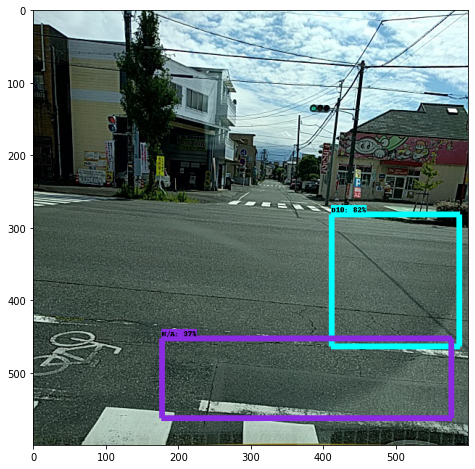

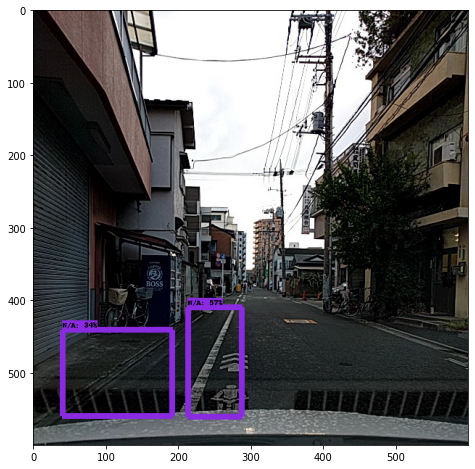

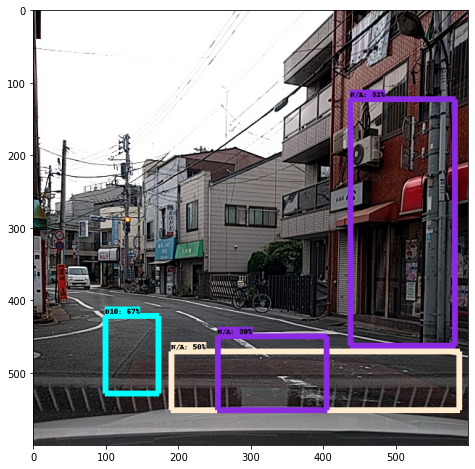

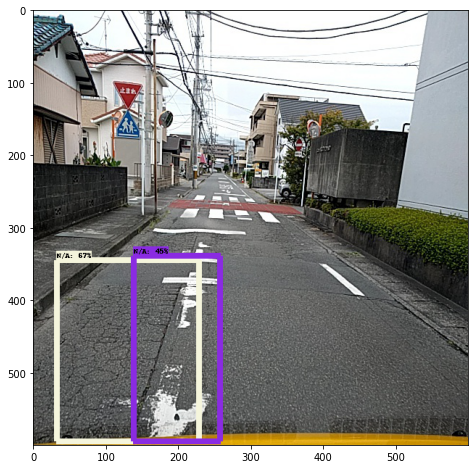

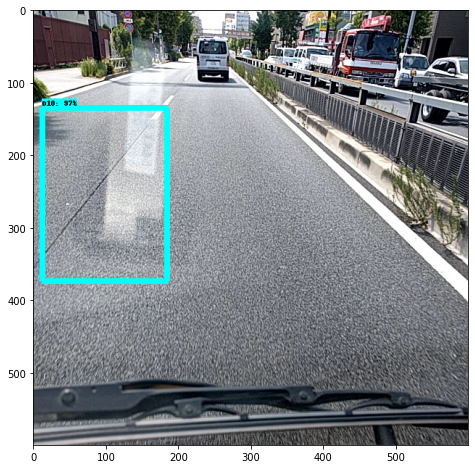

In [36]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          min_score_thresh=0.3,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)